In [2]:
# import所有的库
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from BalancedBinaryClassifier import *
from fsutils import *
from sklearn.model_selection import StratifiedShuffleSplit,cross_validate
import pickle
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.utils import resample
from copy import copy

In [4]:
# 读取数据
expression_data = pd.read_csv("D:/cfRNA/count.matrix.short.tmm.txt", sep='\t', index_col=0)
metadata = pd.read_csv("D:/cfRNA/metadata.short.txt", sep='\t', index_col=0)

In [6]:
# 将表达矩阵处理成机器学习模型可接受的形式
expression_data = expression_data.T
# expression_data = expression_data.rename(index=lambda x: x.replace('.', '-'))
expression_data

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,piR-hsa-810146,piR-hsa-810295,piR-hsa-810360,piR-hsa-81496,piR-hsa-82864,piR-hsa-853922,piR-hsa-85672,piR-hsa-88900,piR-hsa-95220,piR-hsa-95625
Sample_1S1,353.041571,301.444448,335.093662,10791.143094,855.125266,861.169439,186.954130,214.508305,250.737886,1549.084142,...,7.854002,15.902384,72.511982,6.313939,77.409899,4.679760,14.834014,6.554519,17.479653,4.819474
Sample_1S10,441.513539,348.713861,421.300204,11681.110426,1795.315683,995.220063,270.884328,219.431031,258.588607,1890.373900,...,8.272328,14.544465,93.445153,6.244483,64.804115,2.904493,18.703755,9.479826,15.596842,7.457757
Sample_1S11,342.618654,308.726376,342.653103,11328.515911,925.819584,854.510152,197.196089,190.481717,230.417078,1666.130740,...,7.936723,13.372264,84.283720,2.970335,64.672246,4.242933,30.727127,5.898992,16.336198,5.328179
Sample_1S12,433.084871,383.876168,441.556555,11538.115472,1006.619291,776.138056,209.143288,302.255358,356.311473,2137.651775,...,11.963014,18.550171,166.687013,6.459396,85.290196,7.528444,18.397313,2.405916,18.998849,2.933112
Sample_1S13,350.887860,317.216274,326.670462,10568.824796,1146.982476,763.854646,187.432661,211.686241,240.574183,2026.647973,...,11.726936,17.712184,77.392609,13.588872,67.728339,6.613209,15.691866,22.710067,20.026916,14.085555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample_Pan02,180.399860,155.281740,157.817252,7463.404185,395.040500,584.378514,114.721048,120.150103,127.418767,1378.545879,...,15.909773,27.081234,75.856747,12.262220,87.389782,7.201522,11.224164,19.524400,31.270695,10.558938
Sample_Pan03,144.899988,110.556498,138.108738,7658.083843,499.128433,512.394837,100.340745,102.219776,111.676282,1551.021728,...,15.230144,35.108391,93.099492,12.671720,83.370474,3.379454,8.980677,23.753922,31.297746,14.969749
Sample_Pan04,146.106955,122.985368,162.595583,4871.322547,310.951626,458.682153,100.635769,101.218778,135.097557,1453.133797,...,13.094332,27.702238,77.133974,13.136716,94.647173,6.527393,9.747250,12.960631,28.231136,11.443176
Sample_Pan05,212.511487,172.191662,213.608699,7169.252800,464.957303,623.896291,121.713604,145.438026,163.866336,1306.287487,...,15.459616,22.877106,82.625308,12.048437,72.841930,5.874689,15.823459,12.165029,32.734853,7.103793


In [8]:
# scaling
standard_scaler = StandardScaler()
scaled_data = standard_scaler.fit_transform(expression_data)
scaled_expression_data = pd.DataFrame(scaled_data, columns = expression_data.columns, index = expression_data.index)
scaled_expression_data

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,piR-hsa-810146,piR-hsa-810295,piR-hsa-810360,piR-hsa-81496,piR-hsa-82864,piR-hsa-853922,piR-hsa-85672,piR-hsa-88900,piR-hsa-95220,piR-hsa-95625
Sample_1S1,0.010665,-0.049482,-0.100193,0.123748,-0.157218,0.365010,-0.142972,-0.089297,-0.046690,-0.579442,...,-0.533797,-0.715964,-0.450798,-0.586057,0.306336,-0.182508,-0.444536,-0.842410,-0.329671,-1.064564
Sample_1S10,0.637257,0.290263,0.503923,0.536553,2.410780,1.187231,1.484194,-0.043753,0.021451,0.314301,...,-0.344187,-0.975492,0.390077,-0.601977,-0.638161,-1.565696,0.220401,-0.420026,-0.703184,-0.385626
Sample_1S11,-0.063154,0.002856,-0.047218,0.373004,0.035873,0.324164,0.055591,-0.311585,-0.223066,-0.272929,...,-0.496303,-1.199525,0.022066,-1.352422,-0.648041,-0.522859,2.286377,-0.937061,-0.556511,-0.933654
Sample_1S12,0.577562,0.542989,0.645875,0.470226,0.256566,-0.156544,0.287212,0.722518,0.869644,0.961853,...,1.328648,-0.209914,3.332165,-0.552718,0.896772,2.037027,0.167745,-1.441424,-0.028292,-1.550002
Sample_1S13,-0.004588,0.063877,-0.159221,0.020627,0.639949,-0.231886,-0.133694,-0.115406,-0.134906,0.671165,...,1.221644,-0.370072,-0.254746,1.081382,-0.419061,1.323927,-0.297131,1.490281,0.175656,1.319975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample_Pan02,-1.212048,-1.100013,-1.342506,-1.419800,-1.413875,-1.332732,-1.543364,-0.962277,-1.117047,-1.026034,...,3.117550,1.420557,-0.316441,0.777309,1.054085,1.782308,-1.064817,1.030304,2.406204,0.412434
Sample_Pan03,-1.463471,-1.421472,-1.480619,-1.329500,-1.129574,-1.774256,-1.822156,-1.128164,-1.253685,-0.574368,...,2.809503,2.954721,0.376192,0.871167,0.752936,-1.195633,-1.450315,1.641002,2.411570,1.547515
Sample_Pan04,-1.454923,-1.332141,-1.309020,-2.622119,-1.643552,-2.103711,-1.816437,-1.137425,-1.050398,-0.830709,...,1.841427,1.539244,-0.265135,0.977746,1.597850,1.257064,-1.318595,0.082565,1.803215,0.639984
Sample_Pan05,-0.984621,-0.978475,-0.951532,-1.556240,-1.222907,-1.090344,-1.407798,-0.728319,-0.800698,-1.215259,...,2.913513,0.617057,-0.044551,0.728309,-0.035922,0.748514,-0.274520,-0.032311,2.696665,-0.476716


In [10]:
metadata

,RNA Isolation batch,library prepration day,gel cut size selection,label,sex,id,stage,dataset
sample id,,,,,,,,
Sample_1S1,2,22,7,CRC,F,GSM1825212,I,train
Sample_1S10,3,24,1,CRC,F,GSM1825215,I,train
Sample_1S11,3,24,2,CRC,F,GSM1825239,I,test
Sample_1S12,3,25,7,CRC,M,GSM1825071,I,train
Sample_1S13,4,26,2,CRC,F,GSM1825216,I,train
...,...,...,...,...,...,...,...,...
Sample_PC5,2,22,7,PC,M,GSM1825231,NaN,test
Sample_PC6,2,22,8,PC,M,GSM1825257,NaN,train
Sample_PC7,6,23,3,PC,M,GSM1825133,NaN,train


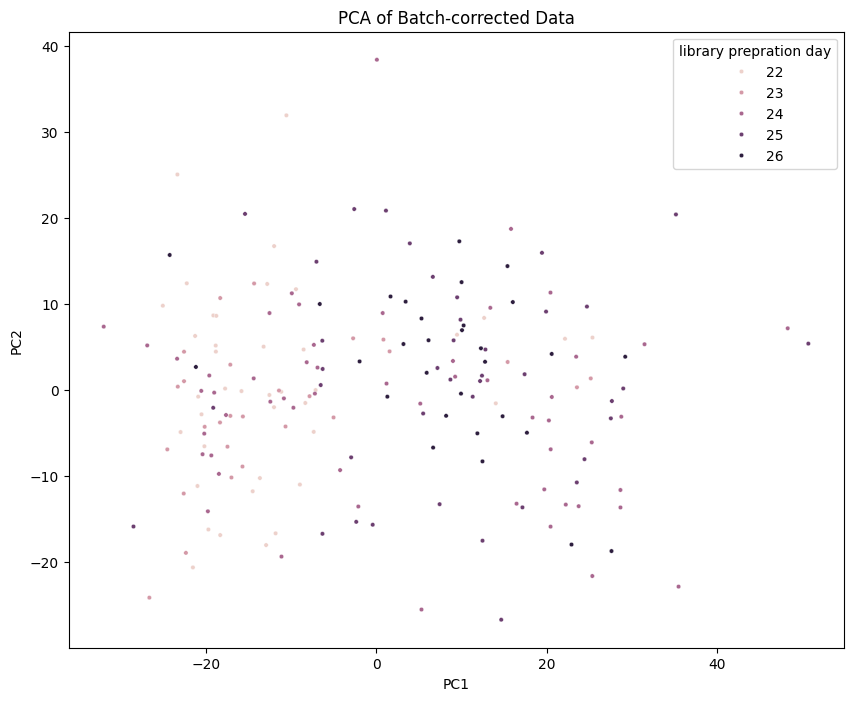

In [12]:
# 降维可视化
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_expression_data)

# 可视化，标记不同source
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=metadata['library prepration day'], s=10)
plt.title('PCA of Batch-corrected Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [14]:
# 数据集拆分（按照metadata划分,HD vs CRC二分类）
metadata = metadata[metadata['label'].isin(['CRC','HD'])]
selected_index = metadata.index
X = np.array(scaled_expression_data.copy().loc[selected_index, :])
y = np.array(metadata.copy().loc[selected_index, 'label'])
# y[y != 'NC'] = 'cancer'
y[y != 'HD'] = int(1)
y[y == 'HD'] = int(0)
y = y.astype(int)


train_index = metadata[metadata['dataset'] == 'train'].index
test_index = metadata[metadata['dataset'] == 'test'].index

X_train = scaled_expression_data.loc[train_index]
y_train = metadata.loc[train_index, 'label']
X_test = scaled_expression_data.loc[test_index]
y_test = metadata.loc[test_index, 'label']
# 简单二分类：患病标记为1，健康标记为0。
y_train[y_train == 'CRC'] = 1
y_test[y_test == 'CRC'] = 1
y_train[y_train == 'HD'] = 0
y_test[y_test == 'HD'] = 0
# y_train[y_train != 'NC'] = 'cancer'
# y_test[y_test != 'NC'] = 'cancer'
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [62]:
# selected_index = metadata[metadata['label'].isin(['CRC','HD'])].index
# X = np.array(scaled_expression_data.copy().loc[selected_index, :])
# y = np.array(metadata.copy().loc[selected_index, 'label'])
# # y[y != 'NC'] = 'cancer'
# y[y != 'HD'] = int(1)
# y[y == 'HD'] = int(0)
# y = y.astype(int)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [16]:
i = 0
def _my_scorer(clf, X_val, y_true_val):  
    #global fout
    global i
    # do all the work and return some of the metrics
    y_pred_val = clf.predict_proba(X_val)[:,1]
    accuracy = metrics.roc_auc_score(y_true_val,y_pred_val)
    #print("\t".join(params)+"\troc_auc:{}".format(accuracy))
    i += 1
    print("cross validation: {}".format(str(i).zfill(3)))
    #print("{}\tcross_validation\t{}".format(str(i).zfill(3),accuracy),file=fout,sep="\t")
    print("{}\tcross_validation\t{}".format(str(i).zfill(3),accuracy))
    return accuracy

In [18]:
def autoTune(estimator,X,y,params_grid):
    """
    使用 GridSearchCV 在给定的 param_grid 上做超参数搜索，以 roc_auc 作为评分指标，
    并返回最佳参数对应的模型（best_estimator_）。
    """
    cv = GridSearchCV(estimator, 
                      params_grid,
                      scoring='roc_auc',
                      refit=True,
                      cv=StratifiedKFold(shuffle=True,random_state=777))
    cv.fit(X,y)
    print(cv.best_params_)         # 打印最优参数
    return cv.best_estimator_      # 返回最优模型

In [20]:
X_train = np.array(X_train)
y_train = np.array(y_train)
clf = BalancedBinaryClassifier(trend="both",space_mask=None,selector=rankSURF)
#splitter = StratifiedShuffleSplit(n_splits=100,test_size=0.2,random_state=666)
splitter = StratifiedShuffleSplit(n_splits=100,test_size=0.2,random_state=777)
cv = cross_validate(clf,X_train,y_train,return_estimator=True,scoring=_my_scorer,cv=splitter,verbose=4,n_jobs=1, error_score='raise')
feature_counts = np.zeros(X_train.shape[1])

cross validation: 001
001	cross_validation	0.41758241758241765
[CV] END ......................................., score=0.418 total time=   0.9s
cross validation: 002
002	cross_validation	0.2912087912087913
[CV] END ......................................., score=0.291 total time=   0.9s
cross validation: 003
003	cross_validation	0.7252747252747253
[CV] END ......................................., score=0.725 total time=   0.8s
cross validation: 004
004	cross_validation	0.7252747252747254
[CV] END ......................................., score=0.725 total time=   0.9s
cross validation: 005
005	cross_validation	0.7912087912087912
[CV] END ......................................., score=0.791 total time=   0.9s
cross validation: 006
006	cross_validation	0.7252747252747254
[CV] END ......................................., score=0.725 total time=   0.9s
cross validation: 007
007	cross_validation	0.7087912087912088
[CV] END ......................................., score=0.709 total time=   0.8

[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:   23.4s


cross validation: 025
025	cross_validation	0.6483516483516483
[CV] END ......................................., score=0.648 total time=   0.9s
cross validation: 026
026	cross_validation	0.554945054945055
[CV] END ......................................., score=0.555 total time=   0.9s
cross validation: 027
027	cross_validation	0.6648351648351649
[CV] END ......................................., score=0.665 total time=   1.0s
cross validation: 028
028	cross_validation	0.7032967032967034
[CV] END ......................................., score=0.703 total time=   0.8s
cross validation: 029
029	cross_validation	0.8516483516483516
[CV] END ......................................., score=0.852 total time=   0.9s
cross validation: 030
030	cross_validation	0.7252747252747254
[CV] END ......................................., score=0.725 total time=   0.9s
cross validation: 031
031	cross_validation	0.6373626373626374
[CV] END ......................................., score=0.637 total time=   0.9s


[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:  1.6min


cross validation: 098
098	cross_validation	0.6813186813186813
[CV] END ......................................., score=0.681 total time=   0.9s
cross validation: 099
099	cross_validation	0.7527472527472527
[CV] END ......................................., score=0.753 total time=   0.9s
cross validation: 100
100	cross_validation	0.8241758241758242
[CV] END ......................................., score=0.824 total time=   0.9s


In [ ]:
# for estimator in cv['estimator']:
#     features = estimator.features
#     feature_counts[features] += 1
#     features_ = [str(x) for x in features]
#     if args.cv_features is not None:
#         out_cv_features.write("\t".join(features_)+"\n")
# if args.cv_features is not None:
#     out_cv_features.close()
# if args.trend == "both_balance":
#     posMean = X.loc[pos_ids_train+pos_ids_test,:].mean(axis=0).values
#     negMean = X.loc[neg_ids_train+neg_ids_test,:].mean(axis=0).values
#     upFreq = feature_counts.copy()
#     upFreq[np.where((posMean-negMean)<0)[0]] = 0 
#     downFreq = feature_counts.copy()
#     downFreq[np.where((posMean-negMean)>0)[0]] = 0
#     features = np.array(list(upFreq.argsort()[::-1][:5]) + list(downFreq.argsort()[::-1][:5]))
    
# else:
#     features = feature_counts.argsort()[::-1][:10]

In [22]:
feature_counts = np.zeros(X_train.shape[1])
for estimator in cv['estimator']:
    features = estimator.features
    feature_counts[features] += 1

# 按上下调选择特征
neg_index = metadata[metadata['label'] == 'HD'].index
pos_index = metadata[metadata['label'] == 'CRC'].index
posMean = scaled_expression_data.loc[pos_index, :].mean(axis=0).values
negMean = scaled_expression_data.loc[neg_index, :].mean(axis=0).values
upFreq = feature_counts.copy()
upFreq[np.where((posMean-negMean)<0)[0]] = 0 
downFreq = feature_counts.copy()
downFreq[np.where((posMean-negMean)>0)[0]] = 0
features = np.array(list(upFreq.argsort()[::-1][:10]) + list(downFreq.argsort()[::-1][:10]))
# features = feature_counts.argsort()[::-1][:10]
features

array([ 502, 1093, 1085,  725,  361, 1258,  595, 1261,  881,  552,  643,
        515, 1260,  786, 1029,  759,   66,  565,  241, 1136])

[[ 0.69495531  1.07437885 -1.05160652 -0.42572608 -0.91531028 -0.38306964
  -0.61254318 -0.49630343  0.05847415 -1.36628795 -1.09583193 -0.43115177
  -0.32349379 -0.40589131 -0.76213217 -0.0745646   0.31091828 -0.00807897
  -0.24002867 -0.49130046]
 [ 0.77370397 -0.45055646 -1.06740945  0.83346484 -1.22340683 -0.27529024
  -0.90157711  1.21342736 -0.34284127 -0.79600012  1.03660021  1.53066003
   1.50523081  0.23961875  3.73390715 -1.09413837  0.49948713  2.83211489
   1.36828398  0.92719956]
 [ 0.39823454  0.39712274 -0.67762835  0.37656764 -0.07835846  1.11132747
   0.1289793   1.59637235  1.67998789  0.0434787  -0.48558615 -0.86863492
  -0.30977984  0.01530539  0.06586319 -0.77585517  0.99711137 -0.35712975
   0.43794566 -0.15282743]
 [-0.26013305 -0.14687667  1.05104556  0.77557258  1.39370189 -0.33073498
   0.84754361  0.82068184  0.59404533  0.9850445   0.53908531  2.48285097
   3.59426513 -1.93758684  1.56019065 -1.01006877  0.96624078  2.98250209
  -0.14416785 -1.67521353]]
{'m

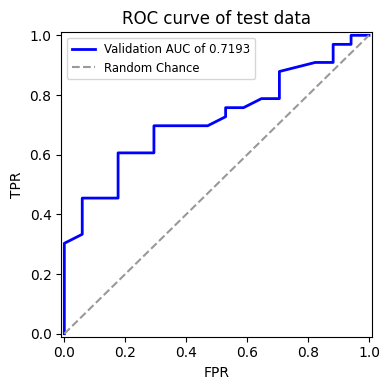

In [24]:
X_test = np.array(X_test)
y_test = np.array(y_test)
# 用 BalancedRandomForestClassifier 再训练一个模型，并用网格搜索调参
clf2 = BalancedRandomForestClassifier(n_estimators=100,random_state=666)
grid = {"max_depth":[2,4,8,16,None]}  # 定义需要搜索的 max_depth 候选值
print(X_test[:,features][:4,:])       # 测试集中选出的特征前几行，调试打印

# 在训练集上自动调参，并得到调参后的最佳模型
clf2 = autoTune(clf2, X_train[:,features], y_train, grid) 
    
# 在测试集上预测，计算并打印 ROC-AUC
y_pred = clf2.predict_proba(X_test[:,features])[:,1]
    # print("ROC-AUC on test set")
    # print("full-training-set\ttest_set\t{}".format(metrics.roc_auc_score(y_test,y_pred)),
    #       sep="\t",file=fout)
    
    # # 保存 ROC 曲线数据到文件
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
AUROC = auc(fpr, tpr)
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, '-', color = 'b', label='Validation AUC of {:.4f}'.format(AUROC), lw=2)
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Chance')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.title('ROC curve of test data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best',fontsize='small')
plt.tight_layout()
plt.show()
plt.close()

In [26]:
# 存储选出的特征
selected_data = scaled_expression_data.iloc[:, features]
selected_data.to_csv('D:/cfRNA/selected_data_short.txt', sep='\t')